<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/neural%20network/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

### IMDB analysis using RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import imdb 
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
print(len(XT),len(Xt))
print(len(XT[0]),len(XT[1]))
print(XT[0])
print(word_index.items())

In [4]:
idx_word = dict([value,key] for (key,value) in word_index.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
## Create a 2D tensor to be processed by the embedding layer
from keras.preprocessing import sequence
## making each vector of size 500 by addding zeros at the start
X_train = sequence.pad_sequences(XT,maxlen = 500)
X_test = sequence.pad_sequences(Xt,maxlen = 500)

In [6]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


In [7]:
## Create a model n kears

from keras.layers import Embedding ,SimpleRNN , Dense
from keras.models import Sequential 

model = Sequential()
model.add(Embedding(100000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          6400000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,403,137
Trainable params: 6,403,137
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="rmsprop",loss = "binary_crossentropy",metrics = ["acc"])

In [9]:
## Saves the best model 
checkpoint = ModelCheckpoint("best_model.h5",monitor= 'val_loss',save_best_only=True,period = 1)

# TO save time it stops when our model seems to be stationary or not improving
earlystop =  EarlyStopping(monitor="val_acc",patience=1)
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks = [checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 24s 153ms/step - loss: 0.6031 - acc: 0.6581 - val_loss: 0.4875 - val_acc: 0.7680
Epoch 2/10
157/157 [==============================] - 24s 152ms/step - loss: 0.3631 - acc: 0.8487 - val_loss: 0.3878 - val_acc: 0.8262
Epoch 3/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2551 - acc: 0.9003 - val_loss: 0.5023 - val_acc: 0.7616


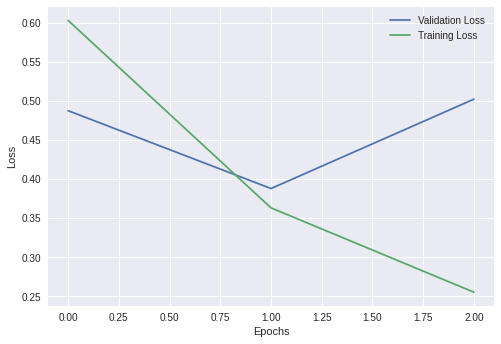

In [10]:
plt.style.use('seaborn')
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.plot(hist.history['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

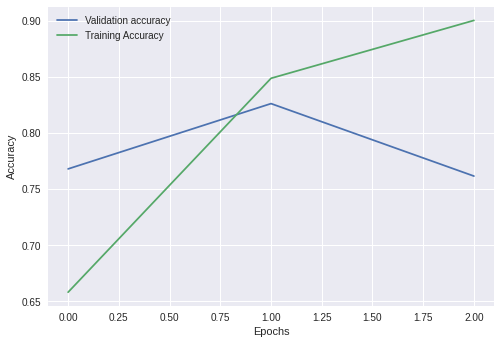

In [11]:
plt.style.use('seaborn')
plt.plot(hist.history['val_acc'],label="Validation accuracy")
plt.plot(hist.history['acc'],label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
model.save("my_model.h5") ## hdf5 format, saves on the disk 

In [13]:
!ls

best_model.h5  my_model.h5  sample_data


In [18]:
model.load_weights("my_model.h5")

In [15]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 16s 21ms/step - loss: 0.4957 - acc: 0.7559


[0.4957340657711029, 0.7559199929237366]

In [16]:
model.evaluate(X_train,YT)

782/782 [==============================] - 16s 21ms/step - loss: 0.3674 - acc: 0.8335


[0.3673568367958069, 0.8334800004959106]

In [21]:

model.load_weights("best_model.h5")

In [22]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 17s 22ms/step - loss: 0.3849 - acc: 0.8328


[0.38488683104515076, 0.8327599763870239]

In [23]:
model.evaluate(X_train,YT)

782/782 [==============================] - 17s 22ms/step - loss: 0.2891 - acc: 0.8864


[0.2891380786895752, 0.8863599896430969]

## Word2Vec Model  

In [24]:
import gensim
from gensim.models import word2vec
from gensim.models import  KeyedVectors
from sklearn.metrics.pairwise import  cosine_similarity

In [25]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-11-04 16:19:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  41.6MB/s    in 66s     

2020-11-04 16:20:36 (23.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [26]:
!gunzip -k GoogleNews-vectors-negative300.bin.gz

In [27]:
word_vectors = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin",binary=True)


In [28]:
v_apple = word_vectors["apple"]
v_mango = word_vectors["mango"]

In [29]:
v_apple.shape,v_mango.shape

((300,), (300,))

In [30]:
cosine_similarity([v_apple],[v_mango])

array([[0.57518554]], dtype=float32)

# Question - Answer - Find odd one out

In [31]:
def odd_one_out(words): # Accepts a list of words and return the odd word amng them
    l = len(words)
    # Gnerate all word embedding for the given list 
    all_words_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_words_vectors,axis=0)
    sim = [cosine_similarity([avg_vector],[w]) for w in all_words_vectors]
    min_sim = 1.0
    odd_one_out = None
    for i in range(l):
        if sim[i] < min_sim:
            min_sim = sim[i]
            odd_one_out = words[i]
        print("similarity b/w %s and avg vector is %0.2f"%(words[i], sim[i]))
    print(min_sim,odd_one_out)
    return odd_one_out    




In [32]:
input_1 = ["apple" , "mango","juice", "party", "orange"]
input_2 = ["music" , "dance" ,"sleep" ,"dancer" ,"food"]
input_3 = ["match","player","football","cricket","dancer"]
input_4 = ["india","paris","russia","france","germany"]

In [33]:
odd_one_out(input_1)

similarity b/w apple and avg vector is 0.78
similarity b/w mango and avg vector is 0.76
similarity b/w juice and avg vector is 0.71
similarity b/w party and avg vector is 0.36
similarity b/w orange and avg vector is 0.65
[[0.357093]] party


'party'

In [34]:
odd_one_out(input_2)

similarity b/w music and avg vector is 0.66
similarity b/w dance and avg vector is 0.81
similarity b/w sleep and avg vector is 0.51
similarity b/w dancer and avg vector is 0.72
similarity b/w food and avg vector is 0.52
[[0.5149707]] sleep


'sleep'

In [35]:
odd_one_out(input_3)

similarity b/w match and avg vector is 0.58
similarity b/w player and avg vector is 0.68
similarity b/w football and avg vector is 0.72
similarity b/w cricket and avg vector is 0.70
similarity b/w dancer and avg vector is 0.53
[[0.52681357]] dancer


'dancer'

In [36]:
odd_one_out(input_4)

similarity b/w india and avg vector is 0.81
similarity b/w paris and avg vector is 0.75
similarity b/w russia and avg vector is 0.79
similarity b/w france and avg vector is 0.81
similarity b/w germany and avg vector is 0.84
[[0.74804693]] paris


'paris'

# Word Analogies Task

In [44]:
def predict_word(a,b,c):
    a = a.lower()
    b = b.lower()
    c = c.lower()
    ## simalirity |b-a| = |d-c| should be maximum
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    words = word_vectors.vocab.keys()
    # print(words)
    max_sim = -100
    d= None
    for w in words:
        if w in [a,b,c]:
            continue
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        if sim > max_sim:
            sim = max_sim
            d = w
    return d

In [46]:
ans = predict_word("man","woman","king")
ans


'queen'

## Using Most similar Methord

In [40]:
word_vectors.most_similar(positive= ["woman" , "king"],negative = ["man"],topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]